
<font size = "5"> **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# HOLZ Lines

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Diffraction/CH2_11-HOLZ_Lines.ipynb)
 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Diffraction/CH2_11-HOLZ_Lines.ipynb)


part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2021

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes



## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install pyTEMlib -q
# pyTEMlib setup ------------------
else:
    if test_package('pyTEMlib') < '0.2021.2.5':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

done


### Import numerical and plotting python packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

and some libraries from the book
* kinematic scattering library.


In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
import sys
if 'google.colab' in sys.modules:
    %pylab --no-import-all inline
else:
    %pylab --no-import-all notebook

# additional package 
import  itertools 
import scipy.constants as const

import ipywidgets as ipyw

# Import libraries from the book

# Import libraries from pyTEMlib

import pyTEMlib
import pyTEMlib.KinsCat as ks         # Kinematic sCattering Library
                             # Atomic form factors from Kirklands book

### And we use the image tool library of Quantifit
import pyTEMlib.file_tools as ft
import pyTEMlib
print(pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
Using KinsCat library version  0.5  by G.Duscher
spglib not installed; Symmetry functions of spglib disabled
0.2021.02.09



## Define  crystal


In [38]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO
tags = ks.structure_by_name('silicon')

## Plot the unit cell

<IPython.core.display.Javascript object>


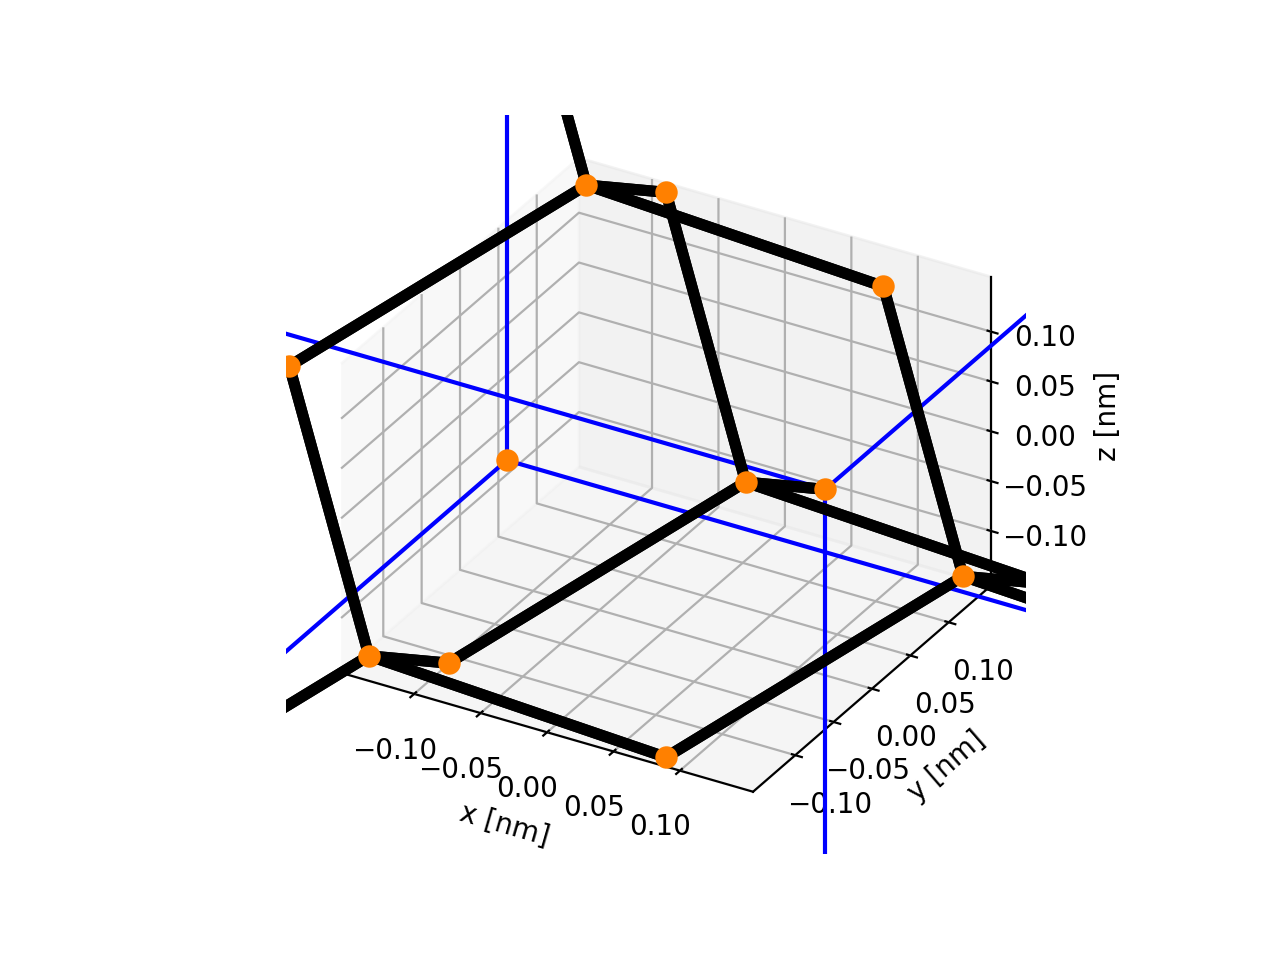

In [39]:
## Just to be sure the crystal structure is right
ks.plot_unitcell(tags)


## Parameters for Diffraction Calculation


In [40]:
tags['acceleration_voltage_V'] = 99 *1000.0 #V

tags['convergence_angle_mrad'] = 0

tags['zone_hkl'] = np.array([2,2,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([0,0,0])  # mistilt in degrees

tags['Sg_max'] = .1 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 16   # Highest evaluated Miller indices


## Kinematic Scattering Calculation

In [41]:
ks.kinematic_scattering(tags, True)
#print(tags['hkl_max'])
print(258*1.05)

reciprocal_unit_cell
[[1.764 0.    0.   ]
 [0.    1.764 0.   ]
 [0.    0.    1.764]]
The inner potential is 84619.583kV
Magnitude of incident wave vector in material 258.6 1/nm and vacuum 268.7 1/nm
The convergence angle of 0mrad = 0.00 1/nm
Rotation angles are 70.5 deg and 45.0 deg
Center of Ewald sphere  [-1.25449755e-14  6.69077352e-15  2.58582676e+02]
Of the 35936 tested reciprocal_unit_cell points, 157 have an excitation error less than 0.10 1/nm
Of the 157 possible reflection 32 are allowed.
 There are 2 allowed reflections in the zero order Laue Zone
 There are 12 allowed reflections in the first order Laue Zone
 There are 2 allowed reflections in the second order Laue Zone
 There are 16 allowed reflections in the other higher order Laue Zones
Length of zone axis vector in real space 1.7 nm
There are 0 forbidden but dynamical activated diffraction spots:
KinsCat's  "Kinematic_Scattering" finished
270.90000000000003


### Plot Selected Area Electron Diffraction Pattern

<IPython.core.display.Javascript object>


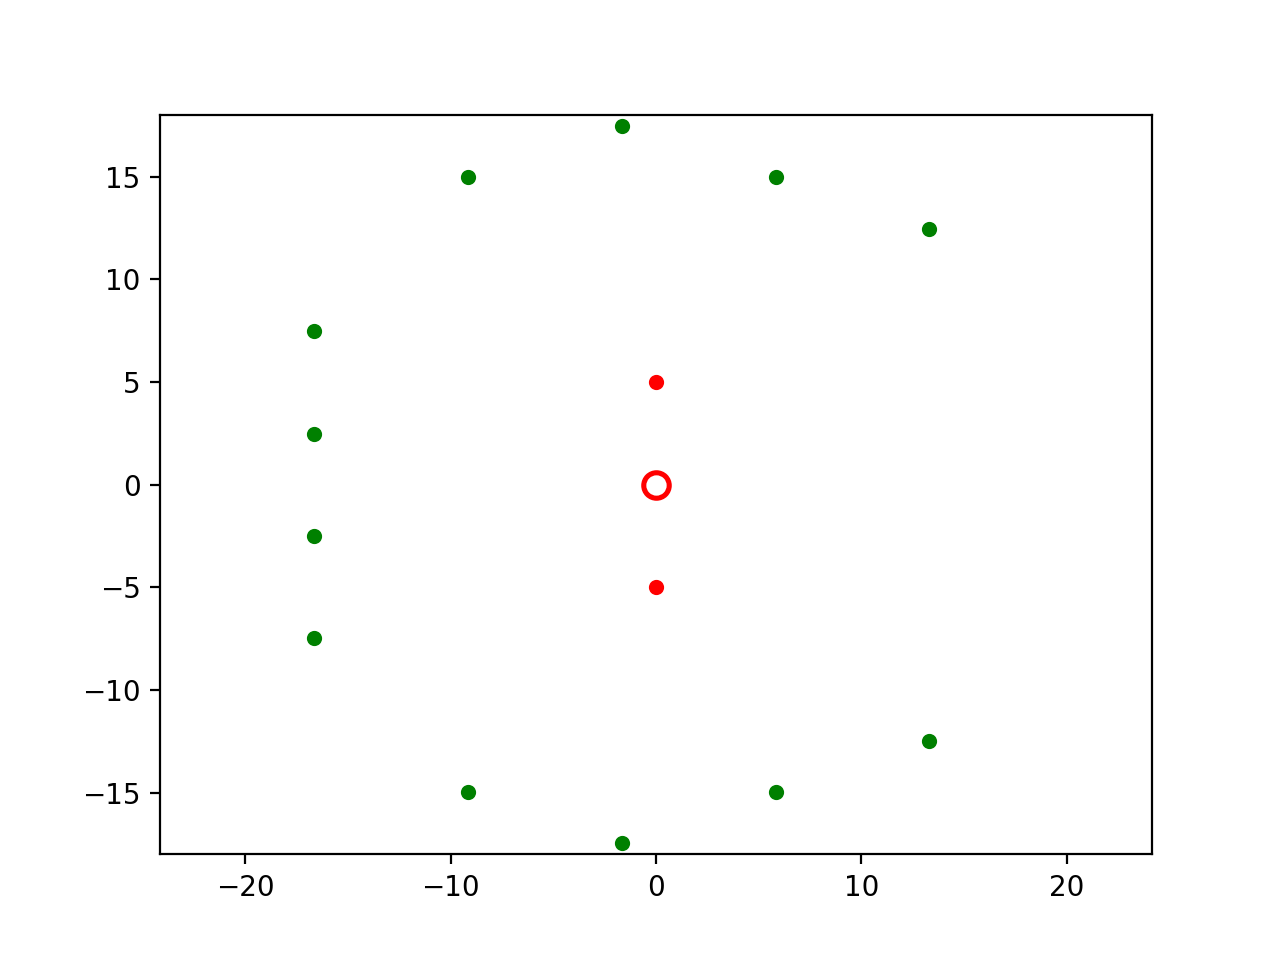

In [42]:
#####################
# Plot ZOLZ SAED Pattern #
#####################

# Get information from dictionary

#We plot only the allowed diffraction spots
points = tags['allowed']['g']
# we sort them by order of Laue zone
ZOLZ = tags['allowed']['ZOLZ']
HOLZ = tags['allowed']['HOLZ']

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
# We plot the x,y axis only; the z -direction is set to zero - this is our projection
ax.scatter(points[ZOLZ,0], points[ZOLZ,1], c='red', s=20)
ax.scatter(points[HOLZ,0], points[HOLZ,1], c='green', s=20)

# zero spot plotting
ax.scatter(0,0, c='red', s=100)
ax.scatter(0,0, c='white', s=40)

ax.axis('equal')
FOV = 18
plt.ylim(-FOV,FOV); plt.xlim(-FOV,FOV); plt.show()

In [343]:
K_0 = [0,1/ks.get_wavelength(700)]
print(np.linalg.norm(K_0))
d_theta = theta2 - theta2e
s = np.sin(d_theta)
c= np.cos(d_theta)

K_0 = [-s* K_0[1],c* K_0[1]]
print(np.linalg.norm(K_0))
print(K_0)

21.580244630136594
21.580244630136594
[0.42355693473324657, 21.576087639319105]


<IPython.core.display.Javascript object>


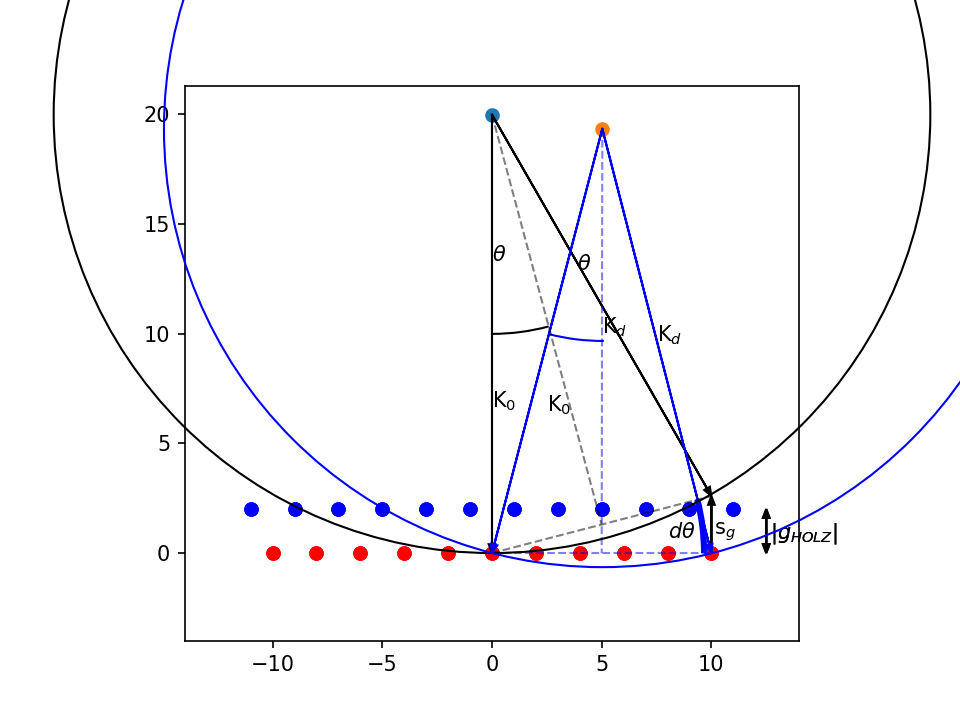

In [7]:
import pyTEMlib.animation  as animate

plt.figure()

animate.deficient_holz_line(exact_bragg=False, laue_zone=1)
animate.deficient_holz_line(exact_bragg='True', laue_zone=1, color='blue')
animate.deficient_holz_line(exact_bragg='True', laue_zone=1, color='red', shift=True)


<IPython.core.display.Javascript object>


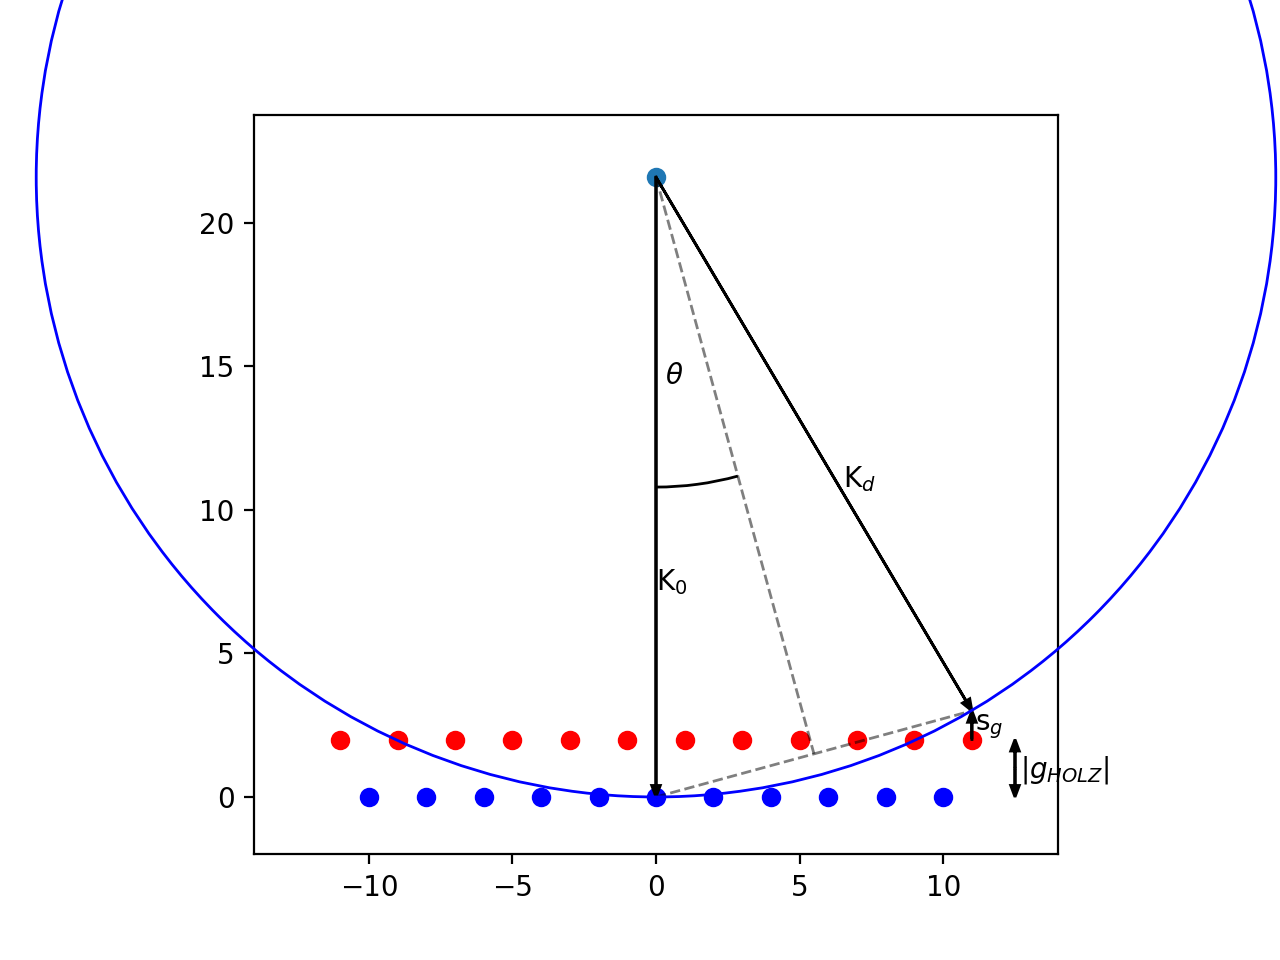

In [496]:
from matplotlib import patches

K_0 = [0,1/ks.get_wavelength(700)]
#K_0= K_0_b 
color_B = 'black'
laue_zone = 1

plt.figure()


if K_0 is None:
    [0,1/ks.get_wavelength(700)]
    
d = .5 # lattice parameter in nm

if laue_zone == 0 and K_0[0] == 0:
    s_g = 1/d+0.3
else:
    if K_0[0] == 0:
        s_g = 1
    else:
        s_g = 0
g = np.linspace(-5,6,12)* 1/d
g_d = np.array([5./d+laue_zone*1/d/2 ,laue_zone*1/d ])


# recirocal lattice
plt.scatter(g[:-1], [0]*11, color='blue')
plt.scatter(g-1/d/2, [1/d]*12, color='red')


plt.gca().arrow(g[-1] +1/d/4, 1/d/2, 0, 1/d/2, head_width=0.3, head_length=0.4, fc='k', 
         ec='k', length_includes_head=True)
plt.gca().arrow(g[-1] +1/d/4, 1/d/2, 0, -1/d/2, head_width=0.3, head_length=0.4, fc='k', 
         ec='k', length_includes_head=True)
plt.gca().annotate("$|g_{HOLZ}|$",  xytext=(g[-1] +1/d/3, 1/d/3), xy=(g[-1] +1/d/3, 1/d/3))

# Ewald Sphere
ewald_sphere = patches.Circle((K_0[0], K_0[1]), radius=np.linalg.norm(K_0), clip_on=False, zorder=10, linewidth=1,
                    edgecolor='blue', fill=False)
plt.gca().add_artist(ewald_sphere)


# K_0
plt.scatter(K_0[0],K_0[1])
plt.gca().arrow(K_0[0], K_0[1], -K_0[0], -K_0[1], head_width=0.3, head_length=0.4, fc=color_B, 
         ec=color_B, length_includes_head=True)
plt.gca().annotate("K$_0$",  xytext=(K_0[0], K_0[1]/3), xy=(K[0], K_0[1]/2))

# K_d Bragg of HOLZ reflection 
plt.gca().arrow(K_0[0], K_0[1], -K_0[0]+g_d[0], -K_0[1]+g_d[1]+s_g, head_width=0.3, head_length=0.4, fc=color_B, 
         ec=color_B, length_includes_head=True)
plt.gca().annotate("K$_d$",  xytext=(6.5/d/2, K_0[1]/2), xy=(6.5/d/2, K_0[1]/2))

# s_g excitation Error of HOLZ reflection
if s_g > 0 :
    plt.gca().arrow(g_d[0], g_d[1], 0, s_g, head_width=0.3, head_length=0.4, fc='k', 
             ec='k', length_includes_head=True)
    plt.gca().annotate("s$_g$",  xytext=(g_d[0]*1.01, g_d[1]+s_g/3), xy=(g_d[0]*1.01, g_d[1]+s_g/3))

# Bragg angle
g_sg = g_d 
g_sg[1] = g_d[1]+s_g
plt.plot([0,g_sg[0]],[0,g_d[1]], color=color_B, linewidth = 1, alpha = 0.5, linestyle='--')
plt.plot([K_0[0],g_sg[0]/2],[K_0[1],g_sg[1]/2], color=color_B, linewidth = 1, alpha = 0.5, linestyle='--')
d_theta = np.degrees(np.arctan(K_0[0]/K_0[1]))
bragg_angle = patches.Arc((K_0[0],K_0[1]), width=K_0[1], height=K_0[1], 
                          theta1=-90-d_theta, 
                          theta2=-90-d_theta+np.degrees(np.arcsin(np.linalg.norm(g_sg/2)/K_0[1])),
                          fc=color_B, ec=color_B)
plt.gca().annotate(r"$\theta $",  xytext=(K_0[0]+.3, K_0[1]/1.5), xy=(K_0[0]+g_d[0]/4, K_0[1]/2))

plt.gca().add_patch(bragg_angle)
#
plt.gca().set_aspect('equal')
plt.xlim(-14,14)
plt.ylim(-1/d,K_0[1]*1.1)

print()

## HOLZ Line Construction
![HOLZ-Lines.jpg](images/HOLZ-Lines.jpg)
![HOLZ-Line-Position.jpg](images/HOLZ-Line-Position.jpg)

$|\vec{g}_{\rm deficient}| = 2 \sin(d\theta/2)*|\vec{K}_0|$

$d\theta = \theta - \varphi$

with:

$\sin(\theta) =\frac{|\vec{g}|/2}{|\vec{K}_0| }$

$\sin(\varphi) = \frac{|\vec{g}_{\rm HOLZ}|}{|\vec{g}|}$

Because $d\theta$ is the same as $d \varphi$ we can now calculate the deficient HOLZ lines


In [11]:
print(tags['inner_potential_V'],tags['inner_potential_V']/tags['volume'])
print( tags['incident_wave_vector_vacuum']*2 )

84619582.96501419 464693677.9826982
537.3826663390798



The Kikuchi lines are the Bisections of lines from the center spot to the Bragg spots.

The line equation for a bisection of a line between two points $(A(x_A,y_A), B(x_B,y_B))$ is  given by the formula:

$y=-\frac{x_A-x_B}{y_A-y_B}x+\frac{x_A^2-x_B^2+y_A^2-y_B^2}{2 \cdot(y_A-y_B)}$

Is $y_A = y_B$, the x is constant at $x= \frac{1}{2} (x_A+x_B)$

In our case  point $B$ is $(0,0)$ and so above equation is:

$y=-\frac{x_A}{y_A}x+\frac{x_A^2+y_A^2}{2 y_A}$ 

If $y_A$ is zero, the line is horizontal and $ x$ is constant at $x= \frac{1}{2} x_A$.

<IPython.core.display.Javascript object>


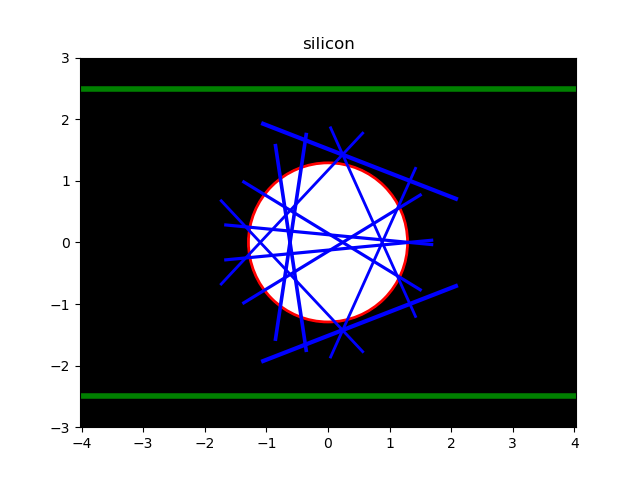

Circle(xy=(0, 0), radius=1.29137)


In [13]:
tags['acceleration_voltage_V'] = 98.8*1000.0 #V

tags['zone_hkl'] = np.array([-2,2,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([-0.0,-0.0,-0.0])  # mistilt in degrees

tags['Sg_max'] = .1 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 9   # Highest evaluated Miller indices

tags['convergence_angle_mrad'] = 5
ks.kinematic_scattering(tags, False)
tags['plot FOV'] = 3
ks.plotHOLZ(tags)
#ks.plotCBED(tags)

<IPython.core.display.Javascript object>


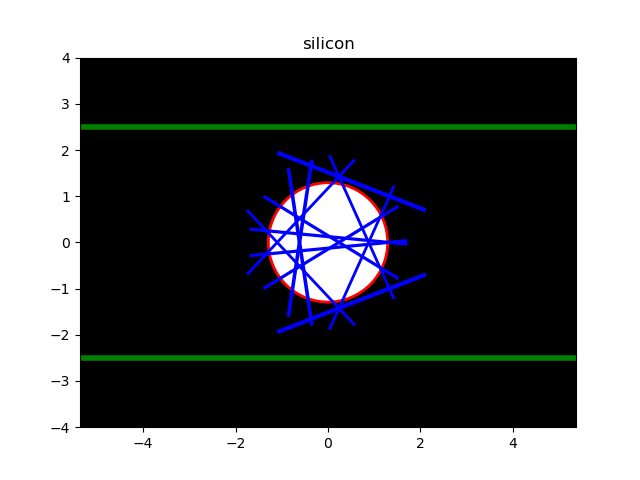

Circle(xy=(0, 0), radius=1.29137)


In [14]:
tags['plot FOV'] = 4

tags['plot_rotation'] = 0
ks.plotHOLZ(tags)

## Now everything together in a single cell

tags['convergence_angle_mrad'] = 0


<IPython.core.display.Javascript object>


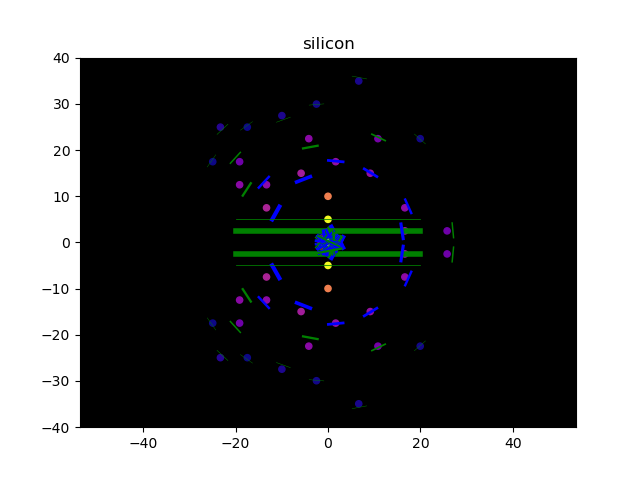

Circle(xy=(0, 0), radius=2)


In [15]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO
tags = ks.structure_by_name('silicon')

tags['acceleration_voltage_V'] = 98.8*1000.0 #V

tags['zone_hkl'] = np.array([-2,2,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([-0.0,-0.0,-0.0])  # mistilt in degrees

tags['Sg_max'] = .2 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 14   # Highest evaluated Miller indices

# Calculation
ks.kinematic_scattering(tags, False)

tags['plot FOV'] = 40

ks.plotCBED(tags);


## Now for graphite and low acceleration voltages.
Change the acceleration voltage and see what happens.

tags['convergence_angle_mrad'] = 0


<IPython.core.display.Javascript object>


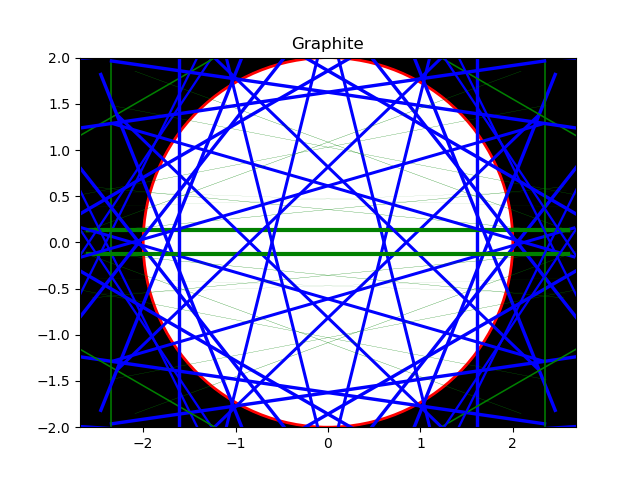

Circle(xy=(0, 0), radius=2)


In [17]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO
tags = ks.structure_by_name('graphite')

tags['acceleration_voltage_V'] = 50.678*1000.0 #V
tags['acceleration_voltage_V'] = 200.*1000.0 #V


tags['zone_hkl'] = np.array([0,0,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([-0.0,-0.0,-0.0])  # mistilt in degrees

tags['Sg_max'] = .2 # 1/nm  maximum allowed excitation error ; This parameter isrelated to the thickness
tags['hkl_max'] = 9   # Highest evaluated Miller indices

# Calculation
ks.kinematic_scattering(tags, False)

tags['plot FOV'] = 2

ks.plotCBED(tags);


## Navigation

- <font size = "3">  **Back: [Kikuchi Lines](CH2_10-Kikuchi_Lines.ipynb)** </font>
- <font size = "3">  **Next: [Lattice Determination with HOLZ](CH2_12-HOLZ_Example.ipynb)** </font>
- <font size = "3">  **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>
